<a href="https://colab.research.google.com/github/Witcape/face_recognition/blob/main/Face_Recognition_Using_Dlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import dlib
import cv2
from IPython.display import Image, display
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
face_detector = dlib.get_frontal_face_detector()
face_encoder = dlib.face_recognition_model_v1("/content/drive/MyDrive/face_recog/dlib_face_recognition_resnet_model_v1.dat")
shape_predictor = dlib.shape_predictor("/content/drive/MyDrive/face_recog/shape_predictor_68_face_landmarks.dat")

In [10]:
image_path_1 = '/content/drive/MyDrive/face_recog/photo1.jpg'
image_path_2 = '/content/drive/MyDrive/face_recog/photo3.jpg'
image_1 = cv2.imread(image_path_1)
image_2 = cv2.imread(image_path_2)

In [11]:
face_locations_1 = face_detector(image_1, 1)
face_locations_2 = face_detector(image_2, 1)

In [12]:
face_descriptors_1 = [face_encoder.compute_face_descriptor(image_1, shape_predictor(image_1, face_location)) for face_location in face_locations_1]
face_descriptors_2 = [face_encoder.compute_face_descriptor(image_2, shape_predictor(image_2, face_location)) for face_location in face_locations_2]

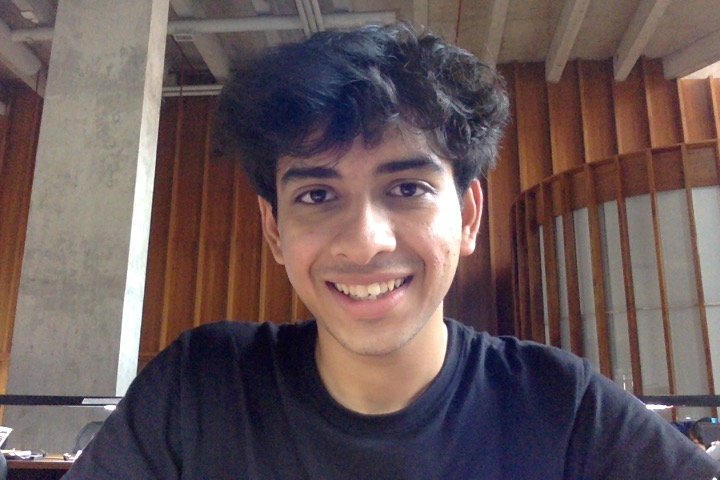

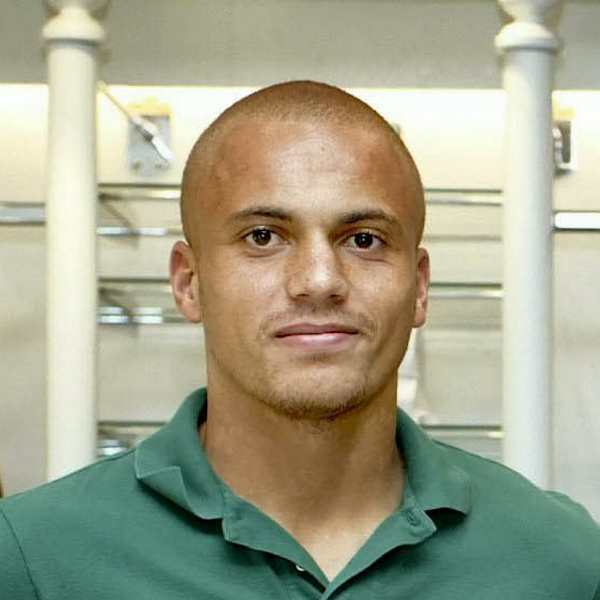

In [16]:
display(Image(filename=image_path_1, width=400))
display(Image(filename=image_path_2, width=400))

In [17]:
face_distance = [np.linalg.norm(np.array(face_descriptor_1) - np.array(face_descriptor_2)) for face_descriptor_1, face_descriptor_2 in zip(face_descriptors_1, face_descriptors_2)]
if all(distance < 0.6 for distance in face_distance):
    print("The two faces are similar.")
else:
    print("The two faces are not similar.")

The two faces are not similar.
